## DATA IMPORT

In [21]:
from DATA import NARMA10

narma = NARMA10(True, [60,0,40])

X_TR, Y_TR = narma.TR()
X_VAL, Y_VAL = narma.VAL()
X_TS, Y_TS = narma.TS()


In [22]:
print(X_TR.shape, Y_TR.shape)
print(X_VAL.shape, Y_VAL.shape)
print(X_TS.shape, Y_TS.shape)

torch.Size([1, 6000]) torch.Size([1, 6000])
torch.Size([1, 0]) torch.Size([1, 0])
torch.Size([1, 4000]) torch.Size([1, 4000])


## ESN (No IP)

In [23]:
from ESN import Reservoir, EchoStateNetwork

network = EchoStateNetwork(Reservoir(1, 1000, ro_rescale=0.5))

# Predict next timestep give all previous
network.train(X_TR, Y_TR, 0.2)

[0.802321046296763, 0.002301870775781036, 0.12527999067416407]


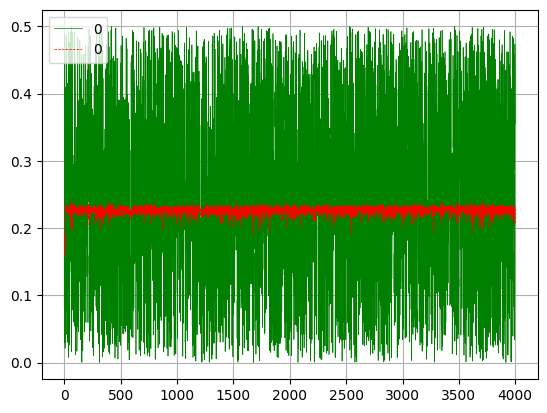

In [24]:
from Metrics import MSE, ME, NRMSE

print([
    network.evaluate(X_TS, Y_TS, metric=NRMSE()),
    network.evaluate(X_TS, Y_TS, metric=MSE()),
    network.evaluate(X_TS, Y_TS, metric=ME(), plot=True)])

## Classic IP ESN (Normal Distribution)

In [25]:
from IPReservoir import IPReservoir
from IntrinsicPlasticity import IPMask

ip_reservoir = IPReservoir(1,10)

ip_mask = IPMask.normalMask(10)

ip_reservoir.setIPTargets(ip_mask)

In [26]:
for _ in range(5): 
    ip_reservoir.predict(X_TR,True,True,True, 0.25)

tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], requires_grad=True) tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], requires_grad=True)


C:\Users\casa_\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\torch\autograd\__init__.py:200: UserWarning: Using backward() with create_graph=True will create a reference cycle between the parameter and its gradient which can cause a memory leak. We recommend using autograd.grad when creating the graph to avoid this. If you have to use this function, make sure to reset the .grad fields of your parameters to None after use to break the cycle and avoid the leak. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\torch\csrc\autograd\engine.cpp:1156.)
  Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


tensor([0.9996, 0.9984, 0.9978, 0.9992, 0.9992, 0.9949, 0.9968, 0.9977, 0.9983,
        0.9943], requires_grad=True) tensor([-0.0052, -0.0063, -0.0086,  0.0039, -0.0019,  0.0129,  0.0108, -0.0069,
        -0.0072, -0.0109], requires_grad=True)
tensor(0.4055, grad_fn=<DivBackward0>)
tensor([0.9996, 0.9984, 0.9978, 0.9992, 0.9992, 0.9949, 0.9968, 0.9977, 0.9983,
        0.9943], requires_grad=True) tensor([-0.0052, -0.0063, -0.0086,  0.0039, -0.0019,  0.0129,  0.0108, -0.0069,
        -0.0072, -0.0109], requires_grad=True)
tensor([0.9992, 0.9969, 0.9953, 0.9982, 0.9982, 0.9902, 0.9942, 0.9951, 0.9967,
        0.9889], requires_grad=True) tensor([-0.0096, -0.0122, -0.0164,  0.0075, -0.0034,  0.0246,  0.0205, -0.0135,
        -0.0136, -0.0209], requires_grad=True)
tensor(0.4026, grad_fn=<DivBackward0>)
tensor([0.9992, 0.9969, 0.9953, 0.9982, 0.9982, 0.9902, 0.9942, 0.9951, 0.9967,
        0.9889], requires_grad=True) tensor([-0.0096, -0.0122, -0.0164,  0.0075, -0.0034,  0.0246,  0.0205, -0

In [ ]:
ip_reservoir.IP_loss

tensor(0.3893, grad_fn=<DivBackward0>)

In [ ]:
ip_reservoir.printIPstats()

Unit - (1): [ ACTUAL_MEAN == (0.08859729021787643)  ACTUAL_STD == (0.10600753128528595)][ TARGET_MEAN == (0.0022318377159535885) TARGET_STD == (1.0117477178573608)]
Unit - (2): [ ACTUAL_MEAN == (-0.04740777984261513)  ACTUAL_STD == (0.07173294574022293)][ TARGET_MEAN == (0.006255787797272205) TARGET_STD == (0.9889535903930664)]
Unit - (3): [ ACTUAL_MEAN == (-0.1562170535326004)  ACTUAL_STD == (0.0367877371609211)][ TARGET_MEAN == (-0.021784482523798943) TARGET_STD == (1.0030089616775513)]
Unit - (4): [ ACTUAL_MEAN == (0.002785949967801571)  ACTUAL_STD == (0.08011684566736221)][ TARGET_MEAN == (-0.026209894567728043) TARGET_STD == (0.9962164163589478)]
Unit - (5): [ ACTUAL_MEAN == (-0.34443727135658264)  ACTUAL_STD == (0.11828077584505081)][ TARGET_MEAN == (-0.0018316839123144746) TARGET_STD == (0.9969444870948792)]
Unit - (6): [ ACTUAL_MEAN == (-0.2020154744386673)  ACTUAL_STD == (0.10585931688547134)][ TARGET_MEAN == (0.02145281806588173) TARGET_STD == (1.001468539237976)]
Unit - (7):

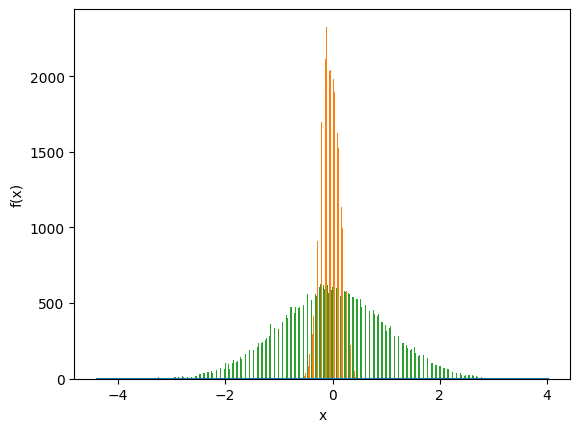

In [30]:
ip_reservoir.plot_overall_activation_distribution(True)

In [ ]:
ip_reservoir.plot_local_neural_activity()

In [27]:
network = EchoStateNetwork(ip_reservoir)

network.train(X_TR, Y_TR, 0.05)

### ESN Evaluation

[0.7556431663979184, 0.0022651822468868566, 0.12359601034622644]


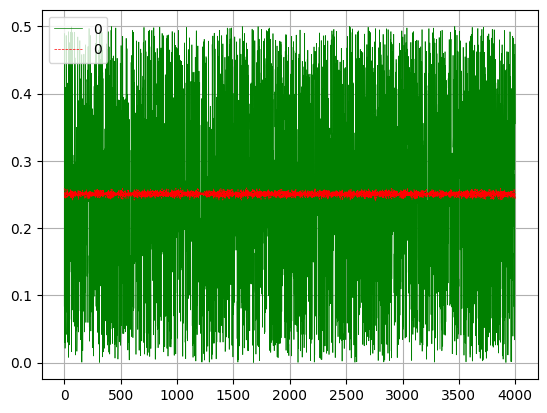

In [29]:
from Metrics import MSE, ME, NRMSE

print([
    network.evaluate(X_TS, Y_TS, metric=NRMSE()),
    network.evaluate(X_TS, Y_TS, metric=MSE()),
    network.evaluate(X_TS, Y_TS, metric=ME(), plot=True)])

## Critical IP ESN (Alternate Positive and Negative Gaussian Distribution)


In [32]:

from IPReservoir import IPReservoir
from IntrinsicPlasticity import IPMask

ip_reservoir = IPReservoir(1,100)

ip_mask = IPMask.mixedBimodalMask(100)

ip_reservoir.setIPTargets(ip_mask)

In [33]:
for _ in range(15): 
    ip_reservoir.predict(X_TR,True,True,True, 0.25)

tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], requires_grad=True) tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.], requires_grad=True)
tensor([1.0014, 0.9996, 0.9987, 0.9992, 1.0003, 0.9998, 1.0000, 1.0015

In [ ]:
ip_reservoir.IP_loss

tensor(0.1501, grad_fn=<DivBackward0>)

In [34]:
ip_reservoir.printIPstats()

Unit - (1): [ ACTUAL_MEAN == (-0.0806441530585289)  ACTUAL_STD == (0.08467434346675873)][ TARGET_MEAN == (-0.9191523790359497) TARGET_STD == (0.566043496131897)]
Unit - (2): [ ACTUAL_MEAN == (0.06252674758434296)  ACTUAL_STD == (0.06858938932418823)][ TARGET_MEAN == (0.9129050970077515) TARGET_STD == (0.576762318611145)]
Unit - (3): [ ACTUAL_MEAN == (0.03229302912950516)  ACTUAL_STD == (0.10468806326389313)][ TARGET_MEAN == (-0.9355689287185669) TARGET_STD == (0.5876057744026184)]
Unit - (4): [ ACTUAL_MEAN == (-0.21109458804130554)  ACTUAL_STD == (0.12884175777435303)][ TARGET_MEAN == (0.9031898975372314) TARGET_STD == (0.5779868364334106)]
Unit - (5): [ ACTUAL_MEAN == (0.23597165942192078)  ACTUAL_STD == (0.1300199180841446)][ TARGET_MEAN == (-0.9161096215248108) TARGET_STD == (0.5754246711730957)]
Unit - (6): [ ACTUAL_MEAN == (-0.0613386332988739)  ACTUAL_STD == (0.11646202206611633)][ TARGET_MEAN == (0.9250530004501343) TARGET_STD == (0.5811417698860168)]
Unit - (7): [ ACTUAL_MEAN =

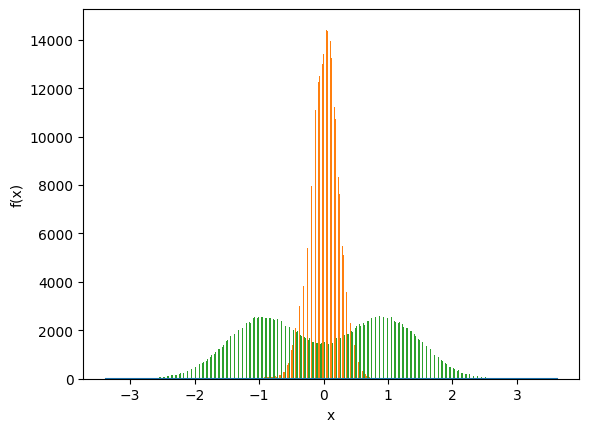

In [35]:

ip_reservoir.plot_overall_activation_distribution()

In [ ]:
ip_reservoir.plot_local_neural_activity()

In [38]:
network = EchoStateNetwork(ip_reservoir)

network.train(X_TR, Y_TR, 0.25)


[0.7545059629816946, 0.0022584514187573624, 0.12314647542464588]


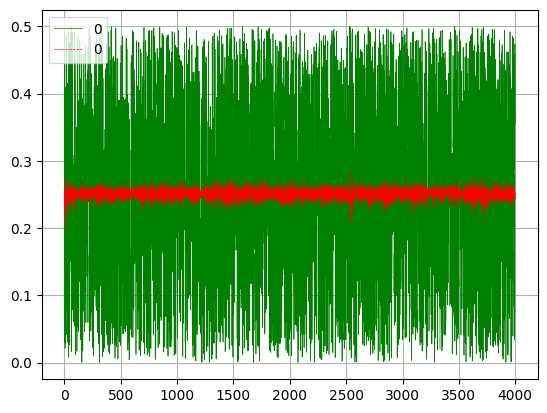

In [39]:
print([
    network.evaluate(X_TS, Y_TS, metric=NRMSE()),
    network.evaluate(X_TS, Y_TS, metric=MSE()),
    network.evaluate(X_TS, Y_TS, metric=ME(), plot=True)])

## Critical IP ESN (Mixture of Gaussian)


In [41]:

from IPReservoir import IPReservoir
from IntrinsicPlasticity import IPMask

ip_reservoir = IPReservoir(1,100)

ip_mask = IPMask.fullBimodalMask(100)

ip_reservoir.setIPTargets(ip_mask)

In [42]:
for _ in range(5): 
    ip_reservoir.predict(X_TR, True,True,True, 0.25)

tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], requires_grad=True) tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.], requires_grad=True)
tensor([0.9998, 0.9992, 0.9985, 0.9999, 0.9989, 0.9981, 0.9999, 1.0003

In [ ]:
ip_reservoir.IP_loss

tensor(0.2437, grad_fn=<DivBackward0>)

In [43]:
ip_reservoir.printIPstats()

Unit - (1): [ ACTUAL_MEAN == (0.26965633034706116)  ACTUAL_STD == (0.10558640211820602)][ TARGET_MEAN == (0.002522400114685297) TARGET_STD == (1.091812014579773)]
Unit - (2): [ ACTUAL_MEAN == (-0.5571255087852478)  ACTUAL_STD == (0.17233265936374664)][ TARGET_MEAN == (-0.02631877362728119) TARGET_STD == (1.0818418264389038)]
Unit - (3): [ ACTUAL_MEAN == (0.5014693140983582)  ACTUAL_STD == (0.10707539319992065)][ TARGET_MEAN == (-0.020882919430732727) TARGET_STD == (1.0970540046691895)]
Unit - (4): [ ACTUAL_MEAN == (0.33663278818130493)  ACTUAL_STD == (0.08819987624883652)][ TARGET_MEAN == (0.012386273592710495) TARGET_STD == (1.092883586883545)]
Unit - (5): [ ACTUAL_MEAN == (0.27531370520591736)  ACTUAL_STD == (0.10394613444805145)][ TARGET_MEAN == (0.001146117108874023) TARGET_STD == (1.0811998844146729)]
Unit - (6): [ ACTUAL_MEAN == (-0.56351238489151)  ACTUAL_STD == (0.1362238973379135)][ TARGET_MEAN == (-0.01838594861328602) TARGET_STD == (1.0691159963607788)]
Unit - (7): [ ACTUAL_

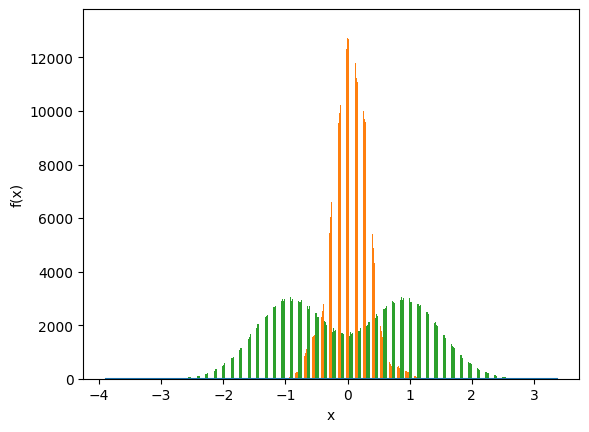

In [44]:

ip_reservoir.plot_overall_activation_distribution()

In [ ]:
ip_reservoir.plot_local_neural_activity()

In [ ]:
network = EchoStateNetwork(ip_reservoir)

network.train(X_TR, Y_TR, 0.05)

[0.7545089583232845, 0.002258451438174257, 0.1231464761473522]


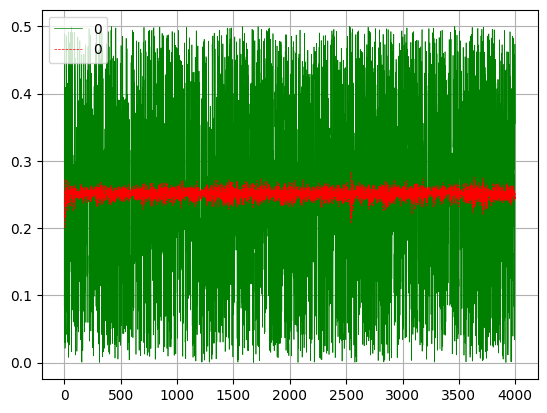

In [45]:
print([
    network.evaluate(X_TS, Y_TS, metric=NRMSE()),
    network.evaluate(X_TS, Y_TS, metric=MSE()),
    network.evaluate(X_TS, Y_TS, metric=ME(), plot=True)])

## [BIASED] Critical IP ESN (Mixture of Gaussian)

In [46]:

from IPReservoir import IPReservoir
from IntrinsicPlasticity import IPMask

ip_reservoir = IPReservoir(1, 100, 1, bias=True)

ip_mask = IPMask.fullBimodalMask(100)

ip_reservoir.setIPTargets(ip_mask)

In [47]:
for _ in range(5): 
    ip_reservoir.predict(X_TR, True,True,True, 0.25)

tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], requires_grad=True) tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.], requires_grad=True)
tensor([1.0001, 0.9995, 0.9994, 1.0001, 0.9990, 0.9995, 1.0005, 0.9985

In [48]:
ip_reservoir.IP_loss

tensor(0.3621, grad_fn=<DivBackward0>)

In [49]:
ip_reservoir.printIPstats()

Unit - (1): [ ACTUAL_MEAN == (-0.5353947281837463)  ACTUAL_STD == (0.061991795897483826)][ TARGET_MEAN == (0.012346519157290459) TARGET_STD == (1.074715256690979)]
Unit - (2): [ ACTUAL_MEAN == (-0.13215932250022888)  ACTUAL_STD == (0.05701591446995735)][ TARGET_MEAN == (-0.004996143281459808) TARGET_STD == (1.091201663017273)]
Unit - (3): [ ACTUAL_MEAN == (0.3838542103767395)  ACTUAL_STD == (0.023349696770310402)][ TARGET_MEAN == (0.013696666806936264) TARGET_STD == (1.0828856229782104)]
Unit - (4): [ ACTUAL_MEAN == (-0.24438965320587158)  ACTUAL_STD == (0.07931631058454514)][ TARGET_MEAN == (-0.004787765443325043) TARGET_STD == (1.0777255296707153)]
Unit - (5): [ ACTUAL_MEAN == (0.9308707118034363)  ACTUAL_STD == (0.06982939690351486)][ TARGET_MEAN == (-0.0055305929854512215) TARGET_STD == (1.0813034772872925)]
Unit - (6): [ ACTUAL_MEAN == (-0.36844027042388916)  ACTUAL_STD == (0.08764432370662689)][ TARGET_MEAN == (0.019676940515637398) TARGET_STD == (1.0979125499725342)]
Unit - (7):

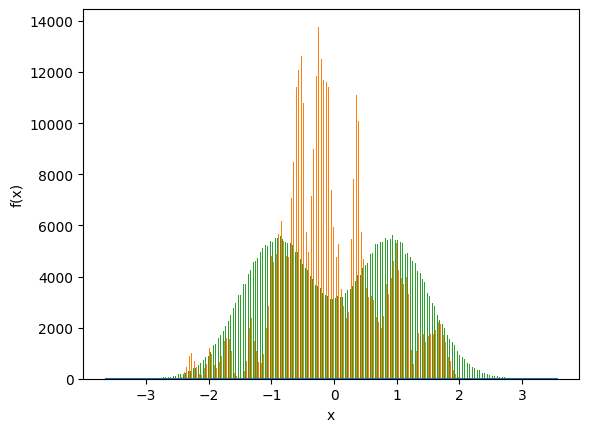

In [50]:

ip_reservoir.plot_overall_activation_distribution()

In [ ]:
ip_reservoir.plot_local_neural_activity()

In [53]:
from ESN import EchoStateNetwork

network = EchoStateNetwork(ip_reservoir)

network.train(X_TR, Y_TR, 0.2)

[0.7520315379406601, 0.0022608045605069568, 0.12338576285684319]


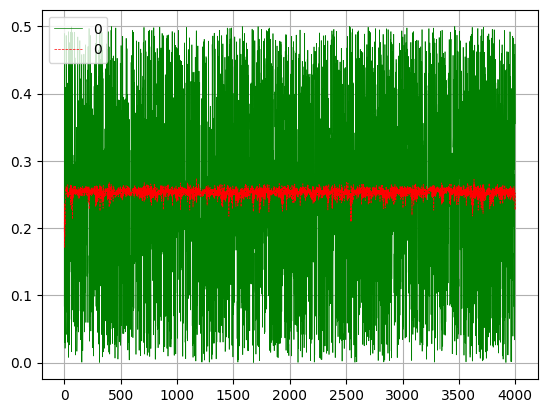

In [54]:
print([
    network.evaluate(X_TS, Y_TS, metric=NRMSE()),
    network.evaluate(X_TS, Y_TS, metric=MSE()),
    network.evaluate(X_TS, Y_TS, metric=ME(), plot=True)])